In [46]:
library(dplyr)
library(tabplot)
library(discretization)
library(pryr)
library(ggplot2)

In [23]:
df <- read.csv("../data/middle/sp2.csv", stringsAsFactors=FALSE)
raw <- df

In [24]:
names(df)

[1] "Time"              "Longitude"         "Latitude"         
 [4] "Speed"             "Brake"             "Accel"            
 [7] "Engine"            "AheadDistance"     "Curve150"         
[10] "Curve100"          "Curve"             "SteeringAngle"    
[13] "BranchFlag"        "DistTollgate"      "RoadType"         
[16] "GreenLamp"         "RedLamp"           "RightLamp"        
[19] "UpLamp"            "LeftLamp"          "StopSign"         
[22] "Limit30Sign"       "Limit50Sign"       "BrakeCar"         
[25] "LeftCar"           "ManBicycleCount"   "ManBicycle"       
[28] "DistManBicycle"    "Pitch"             "DistSignal"       
[31] "PathType"          "LaneCount"         "AccelerationSpeed"
[34] "Jerk"              "TimeHeadway"       "TimeToCollision"  
[37] "RiskFactor"        "AverageVelocity"   "CurveAverage"     
[40] "flag"

In [25]:
invalids <- c('Time', 'Longitude', 'Latitude', 'Brake', 'Accel', 'flag', 'Curve100', 'Curve150')

In [26]:
availColumns <- c('Speed', 'AheadDistance', 'AverageVelocity', 'TimeHeadway', 'RoadType', 'TimeToCollision', 'RiskFactor',
                  'CurveAverage', 'Curve', 'Engine', 'Pitch', 'SteeringAngle', 'DistSignal', 'AccelerationSpeed', 'LaneCount', 'Jerk', 'PathType')

In [27]:
automateColumns <- c("Speed", "AheadDistance", "CurveAverage", "DistSignal", "Pitch", "TimeHeadway", "LaneCount", "AccelerationSpeed", "Jerk", "Curve", "Engine")
manualColumns <- c("AverageVelocity", "RiskFactor", "SteeringAngle", "Pitch")

In [28]:
df$flag[df$flag == "RedA"] <- "Red"
df$flag[df$flag == "RedB"] <- "Red"
df$flag[df$flag == "BlueA"] <- "Blue"
df$flag[df$flag == "BlueB"] <- "Blue"
df$flag <- as.factor(df$flag)

In [29]:
highOuter <- function(firstQu, thirdQu) thirdQu + 1.5*(thirdQu - firstQu)
lowOuter <- function(firstQu, thirdQu) firstQu - 1.5*(thirdQu - firstQu)

In [30]:
thresholdOrIdentity <- function(operator, thresholdFunc, firstQu, thirdQu, val) {
    threshold <- thresholdFunc(firstQu, thirdQu)
    if (do.call(operator, list(val, threshold)))
        return(val)
    return(threshold)
}
    
highOrIdentity <- pryr::partial(thresholdOrIdentity, "<", highOuter)
lowOrIdentity <- pryr::partial(thresholdOrIdentity, ">", lowOuter)

In [31]:
rmOutlier <- function(thresholdFunc, df, col) {
    quant <- quantile(df[[col]])
    firstQu <- quant[2]
    thirdQu <- quant[4]
    idx <- match(col, names(df))
    apply(select(df, idx), 1, pryr::partial(thresholdFunc, firstQu, thirdQu))
}

In [32]:
rmHighOutlier <- partial(rmOutlier, highOrIdentity)
rmLowOutlier <- partial(rmOutlier, lowOrIdentity)

In [33]:
df[automateColumns] <- sapply(automateColumns, function(x) rmHighOutlier(df, x))
df[automateColumns] <- sapply(automateColumns, function(x) rmLowOutlier(df, x))

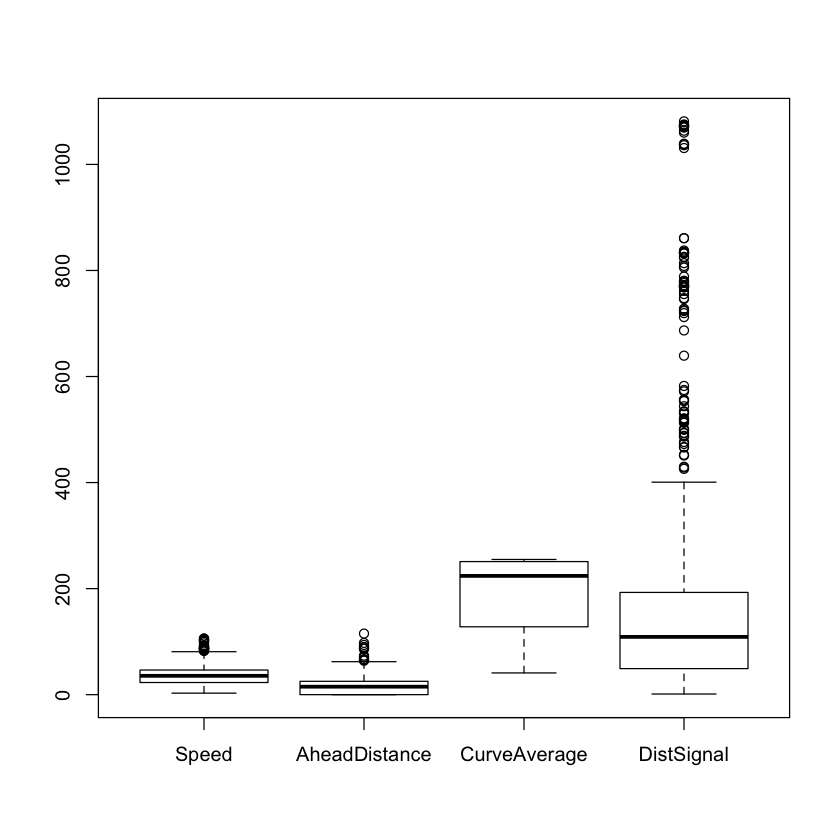

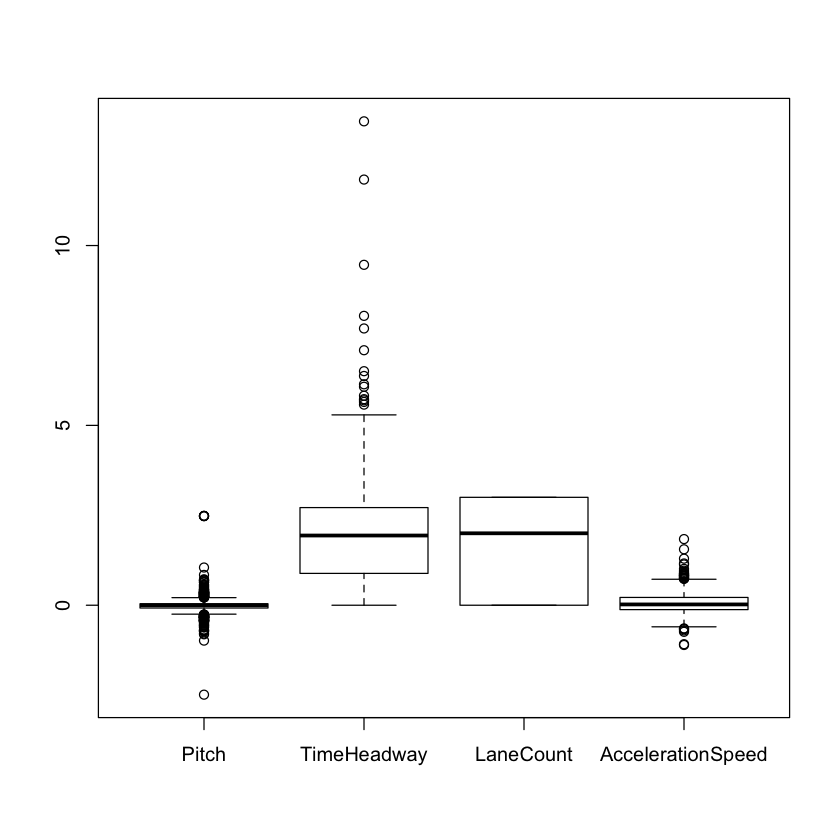

In [60]:
boxplot(raw[automateColumns[1:4]])
boxplot(raw[automateColumns[5:8]])

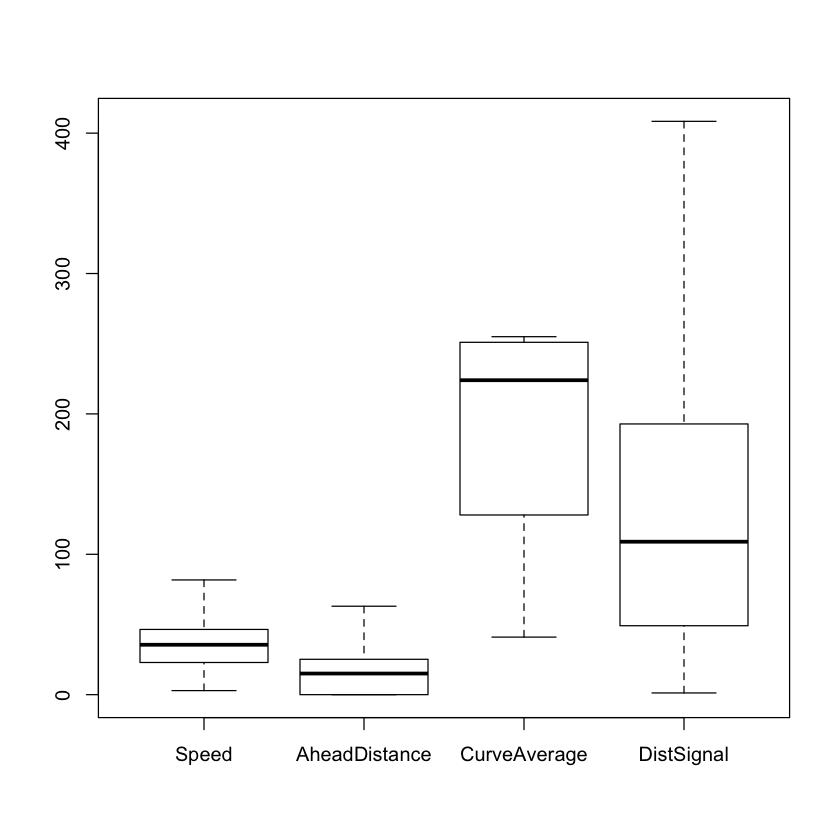

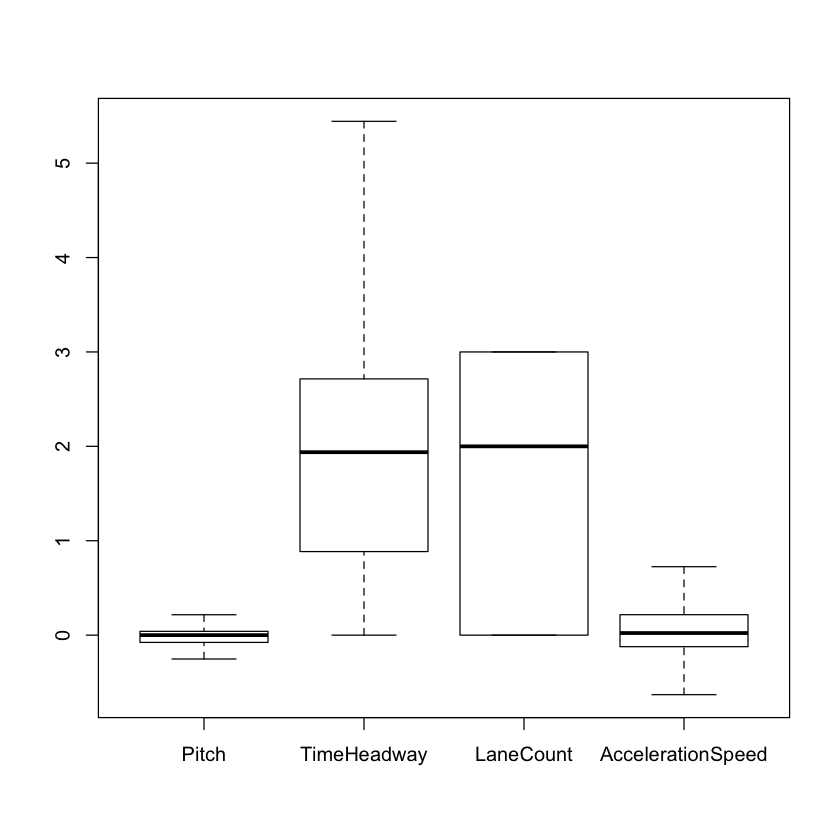

In [34]:
boxplot(df[automateColumns[1:4]])
boxplot(df[automateColumns[5:8]])

 AverageVelocity      RiskFactor            Pitch           
 Min.   : 0.03571   Min.   :-56.58716   Min.   :-2.4865672  
 1st Qu.:18.27094   1st Qu.:  0.00000   1st Qu.:-0.0768657  
 Median :20.44057   Median :  0.29604   Median : 0.0002488  
 Mean   :21.23080   Mean   :  0.09544   Mean   :-0.0039820  
 3rd Qu.:26.09928   3rd Qu.:  0.46910   3rd Qu.: 0.0402985  
 Max.   :30.97930   Max.   :  5.25297   Max.   : 2.4840796  

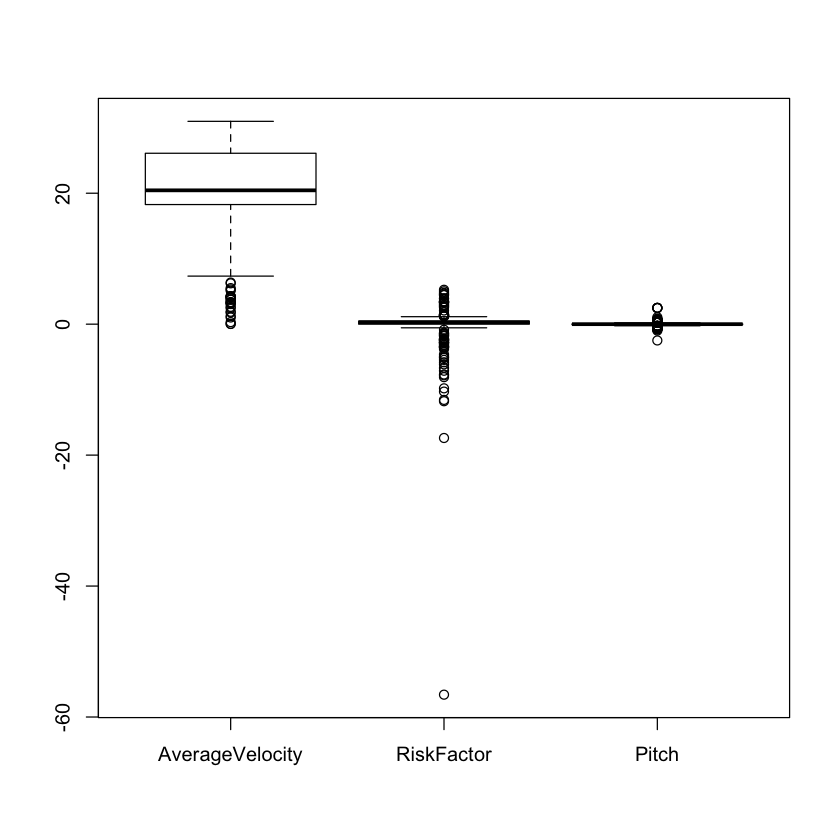

In [36]:
summary(raw[manualColumns[-3]])
boxplot(raw[manualColumns[-3]])

In [59]:
showHists <- function(dfx, col) {
    plot <- qplot(df[[col]], geom="histogram", main=col)
    ggsave(plot, file=paste(col, ".png", collapse=""))
}
sapply(availColumns, function(x) showHists(df, x))

Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Saving 7 x 7 in image

$Speed
NULL

$AheadDistance
NULL

$AverageVelocity
NULL

$TimeHeadway
NULL

$RoadType
NULL

$TimeToCollision
NULL

$RiskFactor
NULL

$CurveAverage
NULL

$Curve
NULL

$Engine
NULL

$Pitch
NULL

$SteeringAngle
NULL

$DistSignal
NULL

$AccelerationSpeed
NULL

$LaneCount
NULL

$Jerk
NULL

$PathType
NULL
